## ЗАДАНИЕ №1

В выполненной работе добавьте замер времени обучения каждой модели.

## Парная регрессия

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [118]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

In [119]:
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [120]:
X = data.x
y = data.y

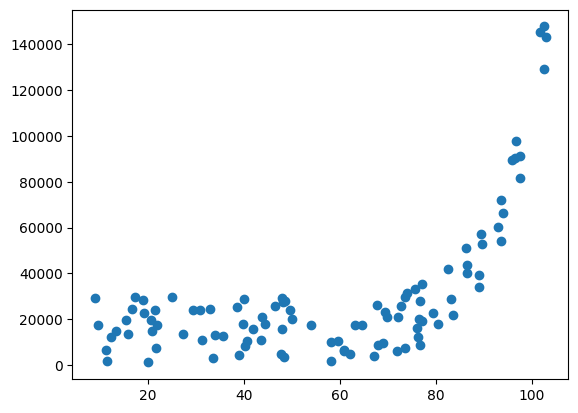

In [121]:
plt.scatter(X, y)

Строим модель линейной регрессии 

Время обучения модели: 0.0060 секунд


d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


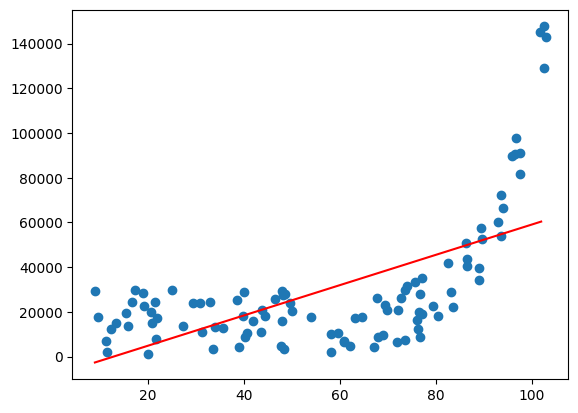

In [122]:
X = pd.DataFrame(X)

start_time = time.time() #начало

from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

end_time = time.time() #конец
trainig_time = end_time - start_time #подсчет времени
print(f'Время обучения модели: {trainig_time:.4f} секунд')

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [123]:
linear.score(X, y)

0.37467360318911636

Строим полиномиальную регрессию

Время обучения модели: 0.010510683059692383 секунд


d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


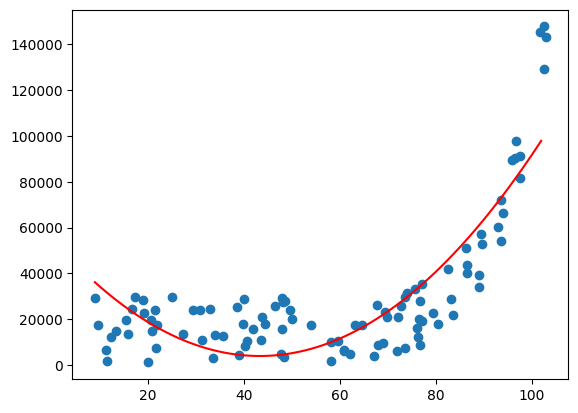

In [124]:
start_time = time.time() #начало

from sklearn.preprocessing import PolynomialFeatures
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)

X_2 = transformation.transform(X)
X_2.shape
X_2[:5]

poly_2d = LinearRegression().fit(X_2, y)
xx_2d = transformation.transform(pd.DataFrame(xx))

end_time = time.time() #конец
training_time = end_time - start_time #подсчет времени
print(f"Время обучения модели: {training_time} секунд")

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [125]:
poly_2d.score(X_2, y)

0.7359753787024842

## Классификация

In [126]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [127]:
y = data.y
X = data.drop(["y"], axis=1)

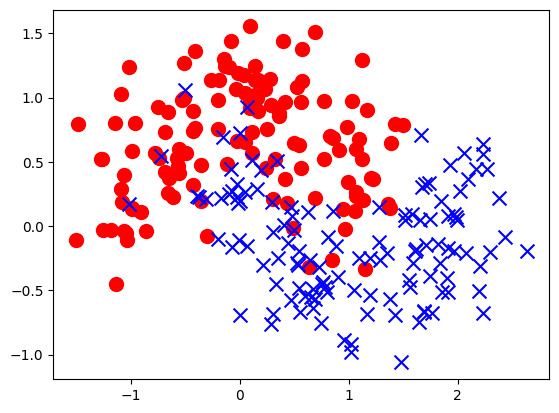

In [128]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

Линейная модель

Время обучения модели: 0.0080108642578125 секунд


C:\Users\mirqa\AppData\Local\Temp\ipykernel_6524\299908060.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
C:\Users\mirqa\AppData\Local\Temp\ipykernel_6524\299908060.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


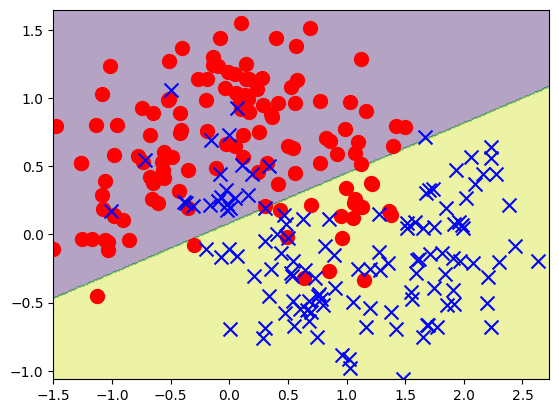

In [129]:
start_time = time.time() #начало

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(X, y)

end_time = time.time() #конец
training_time = end_time - start_time #подсчет времени
print(f"Время обучения модели: {training_time} секунд")

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [130]:
logistic.score(X, y)

0.832

Построение нелинейной (полиномиальной) модели

Время обучения модели: 0.01335763931274414 секунд


d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


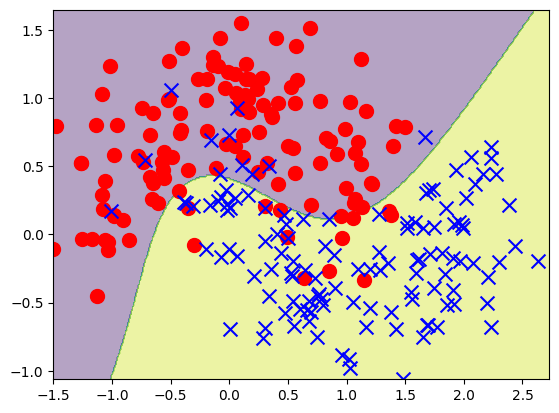

In [131]:
start_time = time.time() #начало

class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

class_3 = LogisticRegression().fit(X_3, y)

end_time = time.time() #конец
training_time = end_time - start_time #подсчет времени
print(f"Время обучения модели: {training_time} секунд")

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

## Регрессия на реальных данных

In [132]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [133]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [134]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [135]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

Строим модель линейной регрессии

Время обучения модели: 0.031732797622680664 секунд


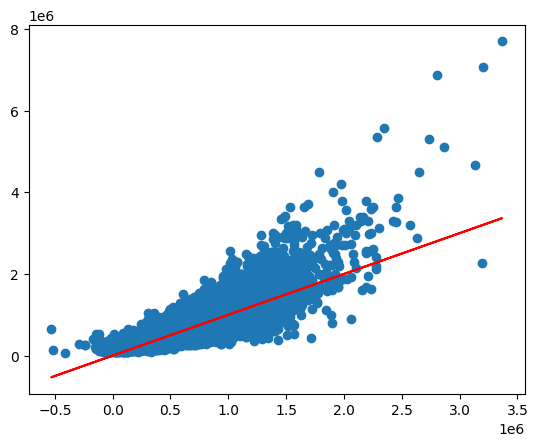

In [136]:
start_time = time.time() #начало

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

end_time = time.time() #конец
training_time = end_time - start_time #подсчет времени
print(f"Время обучения модели: {training_time} секунд")

y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

Строим модель полиномиальной регрессии

Время обучения модели: 6.0933849811553955 секунд


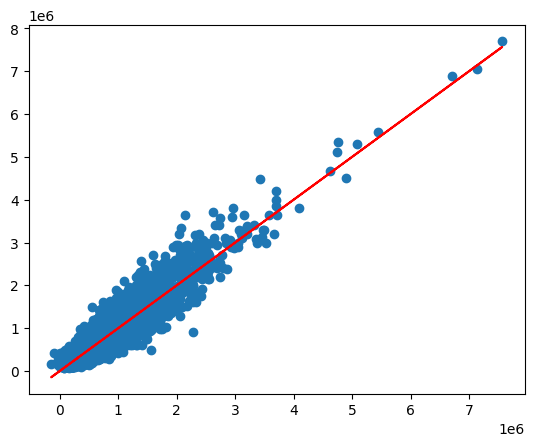

In [137]:
start_time = time.time() #начало

X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

end_time = time.time() #конец
training_time = end_time - start_time #подсчет времени
print(f"Время обучения модели: {training_time} секунд")

y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

## ЗАДАНИЕ №2

На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Порядок 5 - Время обучения: 0.0010 секунд
Порядок 5 - Эффективность: 0.9217

Порядок 10 - Время обучения: 0.0020 секунд
Порядок 10 - Эффективность: 0.9232

Порядок 100 - Время обучения: 0.0090 секунд
Порядок 100 - Эффективность: 0.7925



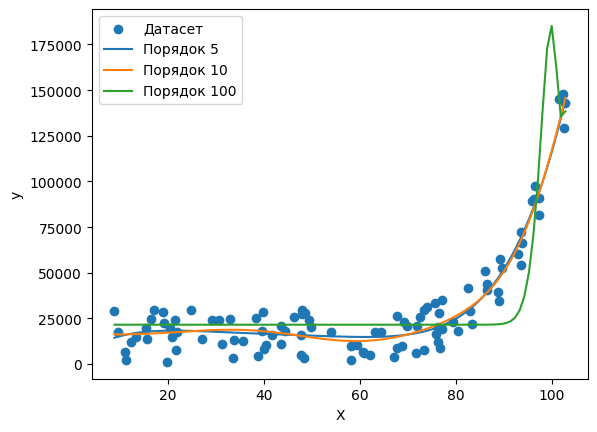

In [139]:
# Загрузка данных
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv"
data = pd.read_csv(url)

# Выделение признаков и целевой переменной
X = data[['x']]
y = data['y']

# Список степеней полинома, которые мы хотим проверить
degrees = [5, 10, 100]

# График данных
plt.scatter(X, y, label='Датасет')

for degree in degrees:
    # Создание полиномиальных признаков
    transformation = PolynomialFeatures(degree=degree)
    X_poly = transformation.fit_transform(X)

    # Создание и обучение модели
    model = LinearRegression()
    
    # Замер времени начала обучения модели
    start_time = time.time()
    
    model.fit(X_poly, y)
    
    # Замер времени окончания обучения модели
    end_time = time.time()

    # Предсказание на основе обученной модели
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # Вывод результатов
    print(f"Порядок {degree} - Время обучения: {end_time - start_time:.4f} секунд")
    print(f"Порядок {degree} - Эффективность: {model.score(X_poly, y):.4f}\n")

    # График предсказаний
    plt.plot(X_range, y_pred, label=f'Порядок {degree}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## ЗАДАНИЕ №3

То же самое проделайте с датасетом для классификации и "King county".

In [ ]:
# Загрузка данных King County
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)

# Выделение признаков и целевой переменной
X_kc = data_kc_prices[['sqft_living']]
y_kc = data_kc_prices['price']

# Создание обучающего и тестового набора данных
X_train, X_test, y_train, y_test = train_test_split(X_kc, y_kc, test_size=0.2, random_state=42)

# Список степеней полинома
degrees = [5, 10, 100]

# График данных
plt.scatter(X_train, y_train, label='Training Data')

for degree in degrees:
    # Создание полиномиальных признаков
    transformation = PolynomialFeatures(degree=degree)
    X_train_poly = transformation.fit_transform(X_train)
    X_test_poly = transformation.transform(X_test)

    # Создание и обучение модели
    model = LinearRegression()
    
    # Замер времени начала обучения модели
    start_time = time.time()
    
    model.fit(X_train_poly, y_train)
    
    # Замер времени окончания обучения модели
    end_time = time.time()

    # Предсказание на тестовом наборе данных
    y_pred = model.predict(X_test_poly)

    # Вывод результатов
    print(f"Degree {degree} - Training time: {end_time - start_time:.4f} seconds")
    print(f"Degree {degree} - R-squared: {model.score(X_test_poly, y_test):.4f}\n")

    # График предсказаний
    X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred_range = model.predict(X_range_poly)
    plt.plot(X_range, y_pred_range, label=f'Degree {degree}')

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()


## ЗАДАНИЕ №4

Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\Питон 3.12\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


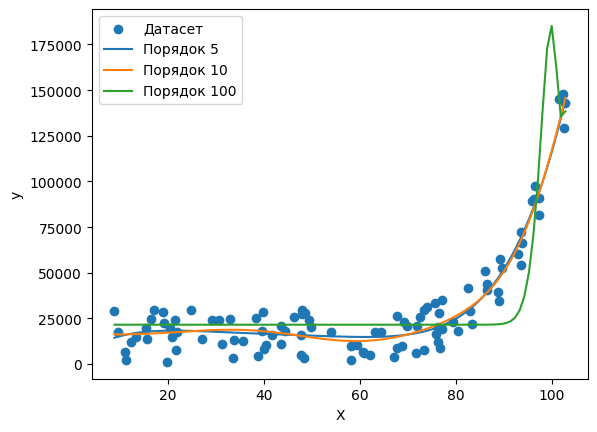

   Порядок  Время обучения (секунды)  Эффективность
0        5                  0.002000       0.921748
1       10                  0.001000       0.923200
2      100                  0.010004       0.792462


In [146]:
# Загрузка данных
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv"
data = pd.read_csv(url)

# Выделение признаков и целевой переменной
X = data[['x']]
y = data['y']

# Список степеней полинома, которые мы хотим проверить
degrees = [5, 10, 100]

# Создание списка для хранения результатов
results_list = []

# График данных
plt.scatter(X, y, label='Датасет')

for degree in degrees:
    # Создание полиномиальных признаков
    transformation = PolynomialFeatures(degree=degree)
    X_poly = transformation.fit_transform(X)

    # Создание и обучение модели
    model = LinearRegression()
    
    # Замер времени начала обучения модели
    start_time = time.time()
    
    model.fit(X_poly, y)
    
    # Замер времени окончания обучения модели
    end_time = time.time()

    # Предсказание на основе обученной модели
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # Запись результатов в список
    results_list.append({
        'Порядок': degree,
        'Время обучения (секунды)': end_time - start_time,
        'Эффективность': model.score(X_poly, y)
    })

    # График предсказаний
    plt.plot(X_range, y_pred, label=f'Порядок {degree}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Создание DataFrame из списка результатов
results = pd.DataFrame(results_list)

# Вывод таблицы результатов
print(results)



In [ ]:
# Загрузка данных King County
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)

# Выделение признаков и целевой переменной
X_kc = data_kc_prices[['sqft_living']]
y_kc = data_kc_prices['price']

# Создание обучающего и тестового набора данных
X_train, X_test, y_train, y_test = train_test_split(X_kc, y_kc, test_size=0.2, random_state=42)

# Список степеней полинома
degrees = [5, 10, 100]

# Создание DataFrame для хранения результатов
results_kc = pd.DataFrame(columns=['Порядок', 'Время обучения (секунды)', 'R-squared'])

# График данных
plt.scatter(X_train, y_train, label='Training Data')

for degree in degrees:
    # Создание полиномиальных признаков
    transformation = PolynomialFeatures(degree=degree)
    X_train_poly = transformation.fit_transform(X_train)
    X_test_poly = transformation.transform(X_test)

    # Создание и обучение модели
    model = LinearRegression()
    
    # Замер времени начала обучения модели
    start_time = time.time()
    
    model.fit(X_train_poly, y_train)
    
    # Замер времени окончания обучения модели
    end_time = time.time()

    # Предсказание на тестовом наборе данных
    y_pred = model.predict(X_test_poly)

    # Вывод результатов
    print(f"Degree {degree} - Training time: {end_time - start_time:.4f} seconds")
    print(f"Degree {degree} - R-squared: {model.score(X_test_poly, y_test):.4f}\n")

    # Добавление результатов в DataFrame
    results_kc = results_kc.append({
        'Порядок': degree,
        'Время обучения (секунды)': end_time - start_time,
        'R-squared': model.score(X_test_poly, y_test)
    }, ignore_index=True)

    # График предсказаний
    X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred_range = model.predict(X_range_poly)
    plt.plot(X_range, y_pred_range, label=f'Degree {degree}')

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

# Добавление результатов в таблицу результатов предыдущей задачи
results = results.append(results_kc, ignore_index=True)

# Вывод обновленной таблицы результатов
print(results)


## ЗАДАНИЕ №5

Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [147]:
# Загрузка данных King County
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)

# Выделение признаков и целевой переменной
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Создание и обучение модели
start_time = time.time()  # начало
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
end_time = time.time()  # конец
training_time = end_time - start_time  # подсчет времени
print(f"Время обучения модели: {training_time:.4f} секунд")

# Вывод коэффициентов и соответствующих атрибутов
coefficients = reg_kc_multiple.coef_
intercept = reg_kc_multiple.intercept_

print("Коэффициенты:")
for feature, coef in zip(X_kc_prices.columns, coefficients):
    print(f"{feature}: {coef}")

print("\nИнтерсепт:", intercept)


Время обучения модели: 0.0210 секунд
Коэффициенты:
bedrooms: -35766.541443610426
bathrooms: 41144.278532307864
sqft_living: 110.44286458511885
sqft_lot: 0.12859786912220286
floors: 6689.550115080808
waterfront: 582960.4584234989
view: 52870.94238431018
condition: 26385.649138595993
grade: 95890.44515148536
sqft_above: 70.7852243504629
sqft_basement: 39.65763998521904
yr_built: -2620.2232112953097
yr_renovated: 19.81258370928905
zipcode: -582.4198656401936
lat: 602748.2264485707
long: -214729.82825334772
sqft_living15: 21.68140046149648
sqft_lot15: -0.3826418495445978

Интерсепт: 6690324.60308499


## ЗАДАНИЕ №6

Попробуйте также проинтерпретировать полиномиальную модель.

In [148]:
# Загрузка данных King County
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)

# Выделение признаков и целевой переменной
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

# Создание полиномиальных признаков
poly_features_kc_prices = PolynomialFeatures(degree=3)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

# Создание и обучение модели
start_time = time.time()  # начало
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end_time = time.time()  # конец
training_time = end_time - start_time  # подсчет времени
print(f"Время обучения модели: {training_time:.4f} секунд")

# Вывод коэффициентов и соответствующих атрибутов
coefficients_poly2_kc = reg_poly2_kc.coef_
intercept_poly2_kc = reg_poly2_kc.intercept_

print("Коэффициенты:")
for feature, coef in zip(poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns), coefficients_poly2_kc):
    print(f"{feature}: {coef}")

print("\nИнтерсепт:", intercept_poly2_kc)


Время обучения модели: 5.5879 секунд
Коэффициенты:
1: -13.447511937187535
bedrooms: 0.2307594163976517
bathrooms: -0.2306315546474867
sqft_living: -2.177370238756142
sqft_lot: 1.9346594560882264
floors: -0.28766525361146233
waterfront: 0.7185814143275101
view: -0.2772223436646298
condition: 0.06645146083671104
grade: -0.573836538691343
sqft_above: 0.5425543645624571
sqft_basement: -0.07748656586262706
yr_built: 0.008854934318097252
yr_renovated: -0.03486836466694842
zipcode: -0.05491597915663699
lat: -0.0388208284145737
long: -0.02577227350450324
sqft_living15: -0.006748318756840731
sqft_lot15: 0.04258354242822265
bedrooms^2: -0.007543561191062324
bedrooms bathrooms: -0.01256964874281679
bedrooms sqft_living: 3.8650885258495813
bedrooms sqft_lot: 35.24454924465408
bedrooms floors: -0.009685522101031976
bedrooms waterfront: 0.012466821664160774
bedrooms view: -0.0009472769436704236
bedrooms condition: 0.01937562231459285
bedrooms grade: 0.01362006481161456
bedrooms sqft_above: 3.5646245